# 식품

In [1]:
dataset=[['사과','치즈','생수'],
         ['생수','호두','치즈','고등어'],
         ['수박','사과','생수'],
         ['생수','호두','치즈','옥수수']]

In [2]:
#! pip install mlxtend

In [3]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

#트랜잭션 자료형으로 변환
#x축 전체품목, y축 거래아이디(한장의 영수증)
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)

df = pd.DataFrame(te_ary, columns=te.columns_) #데이터프레임으로 변환
df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [9]:
#선험적 알고리즘  support >0.5 이상
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
#                                    기준값
frequent_itemsets

#사과를 살 확률은 0.5
#치즈,생수를 같이 살 확률은 75%

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(생수, 사과)"
5,0.75,"(생수, 치즈)"
6,0.50,"(생수, 호두)"
7,0.50,"(치즈, 호두)"
8,0.50,"(생수, 치즈, 호두)"


In [10]:
#confidence > 0.3(기본값 0.8)
from mlxtend.frequent_patterns import association_rules

rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rules

# antecedents(선행) consequents(후행) lift(1보다 크면 a를 사면 b도 삼 / 1보다 작으면 a를 사면 b는 안삼)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(사과),(생수),0.50,1.00,0.50,1.0,1.000000,0.000,inf,0.0
1,(치즈),(생수),0.75,1.00,0.75,1.0,1.000000,0.000,inf,0.0
2,(호두),(생수),0.50,1.00,0.50,1.0,1.000000,0.000,inf,0.0
3,(호두),(치즈),0.50,0.75,0.50,1.0,1.333333,0.125,inf,0.5
4,"(생수, 호두)",(치즈),0.50,0.75,0.50,1.0,1.333333,0.125,inf,0.5
5,"(치즈, 호두)",(생수),0.50,1.00,0.50,1.0,1.000000,0.000,inf,0.0
6,(호두),"(생수, 치즈)",0.50,0.75,0.50,1.0,1.333333,0.125,inf,0.5


In [6]:
# ! pip install decorator==5.0.9
# ! pip install networkx

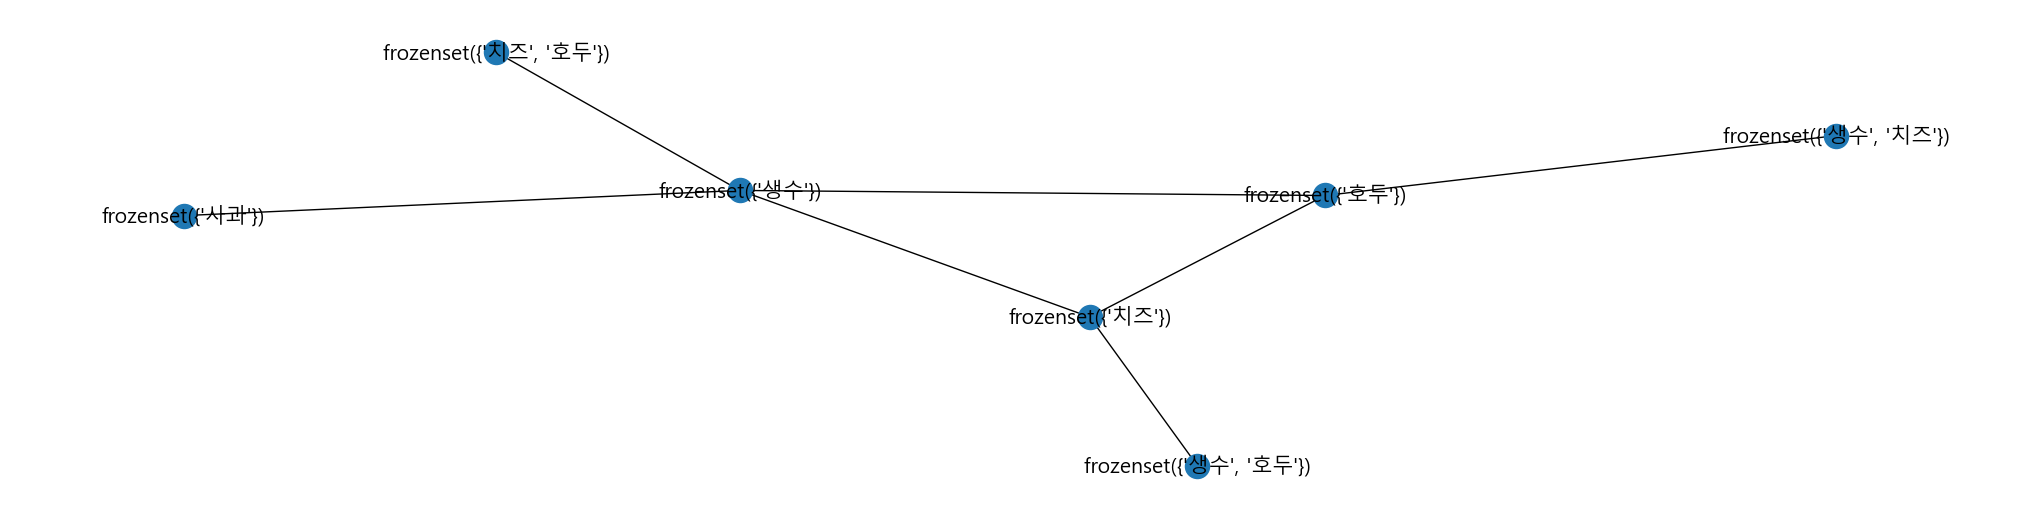

In [7]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import networkx as nx
# antecedents 선행(~라면), consequents 결과(~이다)
#       선행                        후행
ga=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
plt.figure(figsize=(20,5))
nx.draw(ga,with_labels=True,font_family=font_name,font_size=15)
# source(그래프의 안쪽 노드들), target(그래프의 바깥쪽 노드들)
#                선행                         후행
#                사과           =>            호두